# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import datetime as dt
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [81]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [84]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
        metric = "metric"
        city_url = f"{url}appid={weather_api_key}&units={metric}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather["coord"]["lat"])
        city_lng = (city_weather["coord"]["lon"])
        city_max_temp = (city_weather["main"]["temp_max"])
        city_humidity = (city_weather["main"]["humidity"])
        city_clouds = (city_weather["clouds"]["all"])
        city_wind = (city_weather["wind"]["speed"])
        city_country = (city_weather["sys"]["country"])
        city_date = (city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | jiaonan
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | kieta
Processing Record 10 of Set 1 | puerto carreno
Processing Record 11 of Set 1 | pathein
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | pevek
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | camacha
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | nome
Processing Record 20 of Set 1 | palana
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | buston
Processing Record 23 of Set 1 | port alfred
Processing Rec

In [85]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikolskoye,59.7035,30.7861,-4.06,93,89,0.49,RU,1674461278
1,mataura,-46.1927,168.8643,11.33,71,7,1.88,NZ,1674461279
2,vaini,-21.2000,-175.2000,26.09,94,20,0.00,TO,1674461279
3,albany,42.6001,-73.9662,0.36,93,100,1.68,US,1674461280
4,new norfolk,-42.7826,147.0587,22.72,85,100,1.13,AU,1674461280
...,...,...,...,...,...,...,...,...,...
560,chengde,40.9725,117.9361,-15.18,51,0,5.81,CN,1674461416
561,vrangel,42.7297,133.0839,-9.93,60,100,7.34,RU,1674461416
562,derzhavinsk,51.1000,66.3167,-9.60,89,17,3.32,KZ,1674461416
563,the valley,18.2170,-63.0578,25.05,72,14,10.34,AI,1674461416


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,25.85,79,26,8.45,PF,1674198884
1,wanning,18.8003,110.3967,21.78,66,89,5.98,CN,1674198885
2,biak,-0.9131,122.8766,28.70,68,100,1.50,ID,1674198885
3,olafsvik,64.8945,-23.7142,2.72,96,100,18.53,IS,1674198886
4,mahanoro,-19.9000,48.8000,26.66,87,100,3.61,MG,1674198886


In [113]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")
city_data_df.to_csv

<bound method NDFrame.to_csv of                 City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0         nikolskoye  59.7035   30.7861     -4.06        93          89   
1            mataura -46.1927  168.8643     11.33        71           7   
2              vaini -21.2000 -175.2000     26.09        94          20   
3             albany  42.6001  -73.9662      0.36        93         100   
4        new norfolk -42.7826  147.0587     22.72        85         100   
...              ...      ...       ...       ...       ...         ...   
560          chengde  40.9725  117.9361    -15.18        51           0   
561          vrangel  42.7297  133.0839     -9.93        60         100   
562      derzhavinsk  51.1000   66.3167     -9.60        89          17   
563       the valley  18.2170  -63.0578     25.05        72          14   
564            basco  20.4487  121.9702     24.93        75         

In [107]:
# Read saved data
city_data_df = pd.read_csv('cities.csv', index_col="City_ID")

# Display sample data
city_data_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikolskoye,59.7035,30.7861,-4.06,93,89,0.49,RU,1674461278
1,mataura,-46.1927,168.8643,11.33,71,7,1.88,NZ,1674461279
2,vaini,-21.2000,-175.2000,26.09,94,20,0.00,TO,1674461279
3,albany,42.6001,-73.9662,0.36,93,100,1.68,US,1674461280
4,new norfolk,-42.7826,147.0587,22.72,85,100,1.13,AU,1674461280
...,...,...,...,...,...,...,...,...,...
560,chengde,40.9725,117.9361,-15.18,51,0,5.81,CN,1674461416
561,vrangel,42.7297,133.0839,-9.93,60,100,7.34,RU,1674461416
562,derzhavinsk,51.1000,66.3167,-9.60,89,17,3.32,KZ,1674461416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

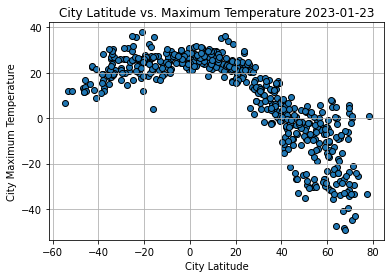

In [100]:
# Build scatter plot for latitude vs. temperature
date = dt.date.today()

plt.scatter(city_data_df["Lat"], city_data_df['Max Temp'], edgecolors='black', )
# Incorporate the other graph properties
plt.xlabel ("City Latitude")
plt.ylabel ("City Maximum Temperature")
plt.title (f"City Latitude vs. Maximum Temperature {date}")
plt.grid()

# Save the figure
plt.savefig("Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

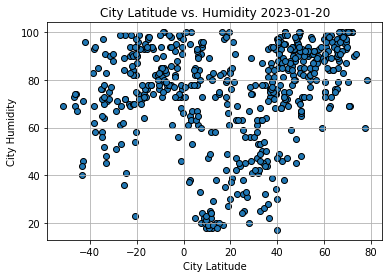

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= 'black')

# Incorporate the other graph properties
plt.xlabel ("City Latitude")
plt.ylabel ("City Humidity")
plt.title (f"City Latitude vs. Humidity {date}")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

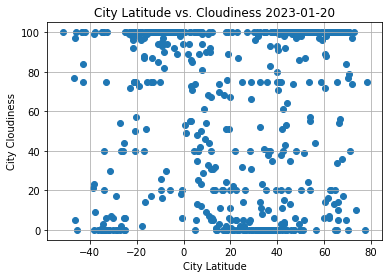

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel ("City Latitude")
plt.ylabel ("City Cloudiness")
plt.title (f"City Latitude vs. Cloudiness {date}")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

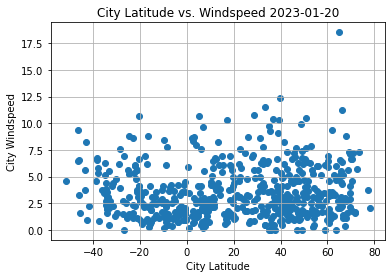

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel ("City Latitude")
plt.ylabel ("City Windspeed")
plt.title (f"City Latitude vs. Windspeed {date}")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.scatter(x,y, edgecolors='black')
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wanning,18.8003,110.3967,21.78,66,89,5.98,CN,1674198885
3,olafsvik,64.8945,-23.7142,2.72,96,100,18.53,IS,1674198886
5,copainala,17.0833,-93.2000,19.32,97,68,0.78,MX,1674198886
7,marawi,7.9986,124.2928,22.75,94,94,2.21,PH,1674198887
8,porto novo,6.4965,2.6036,26.90,84,89,0.74,BJ,1674198801
...,...,...,...,...,...,...,...,...,...
546,paka,4.6374,103.4368,27.96,78,40,4.12,MY,1674198844
547,kemijarvi,66.7131,27.4306,-1.29,91,100,5.11,FI,1674199056
550,dzilam gonzalez,21.2833,-88.9333,22.85,96,22,3.23,MX,1674199057


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.85,79,26,8.45,PF,1674198884
2,biak,-0.9131,122.8766,28.70,68,100,1.50,ID,1674198885
4,mahanoro,-19.9000,48.8000,26.66,87,100,3.61,MG,1674198886
6,labuhan,-6.8844,112.2051,28.52,76,100,4.25,ID,1674198886
10,port elizabeth,-33.9180,25.5701,24.50,71,100,3.60,ZA,1674198888
...,...,...,...,...,...,...,...,...,...
536,george,-33.9630,22.4617,20.75,78,40,2.06,ZA,1674199053
538,pitimbu,-7.4706,-34.8086,23.33,79,30,3.63,BR,1674199053
542,port shepstone,-30.7414,30.4550,25.95,77,7,1.34,ZA,1674199055


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.862354887778264


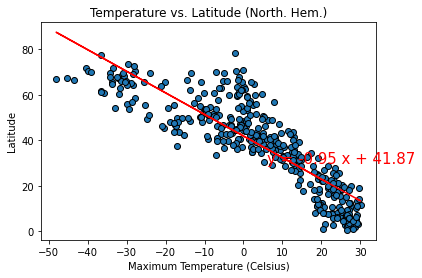

In [73]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Max Temp']
y = northern_hemi_df['Lat']

plt.title("Temperature vs. Latitude (North. Hem.)")
plt.xlabel ("Maximum Temperature (Celsius)")
plt.ylabel ("Latitude")
plot_linear_regression(x, y, (6,30))


The r-squared is: 0.2828847774285777


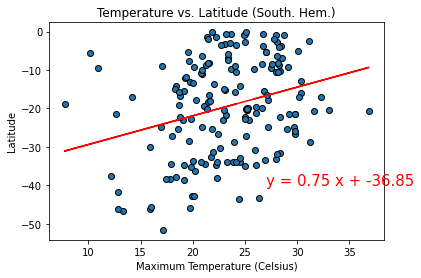

In [89]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df ['Max Temp']
y = southern_hemi_df ['Lat']

plt.title("Temperature vs. Latitude (South. Hem.)")
plt.xlabel ("Maximum Temperature (Celsius)")
plt.ylabel ("Latitude")
plot_linear_regression(x, y, (27, -40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The two scatterplots above extract data from the “Open Weather” online application. This parsed data has been converted from a .json() to a .csv dataframe allowing specific qualities to be compared through central tendencies. The firs scatterplot uses only data from the norther hemisphere. This includes countries with a latitude of 0 or greater. The maximum temperature of each country is plotted against the latitude to reveal a  strong, negative correlation, as provided by the r-value of -86. This standard error indicates that countries in the northern hemisphere have a strong correlation. The farther from the equator, the lower he temperature, and the closer to the equator, the higher the temperature. This can be acknowledged as an inverse relationship.
The data using only countries from the southern hemisphere yields a very small positive correlation. The spread of data is evidently greater, and thus the cerraltion yields a slimmer value.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.48455385437031007


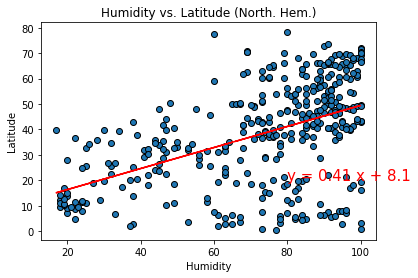

In [57]:
x = northern_hemi_df['Humidity']
y = northern_hemi_df['Lat']

plt.title("Humidity vs. Latitude (North. Hem.)")
plt.xlabel ("Humidity")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (80,20))


The r-squared is: 0.3355296672469624


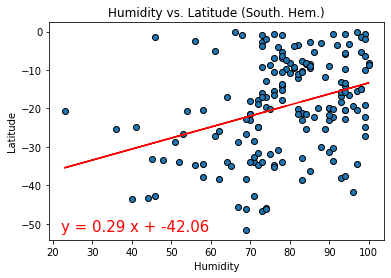

In [72]:
# Southern Hemisphere

x = southern_hemi_df ['Humidity']
y = southern_hemi_df ['Lat']

plt.title("Humidity vs. Latitude (South. Hem.)")
plt.xlabel ("Humidity")
plt.ylabel ("Latitude")
plot_linear_regression(x, y, (22, -52))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

When investigating the relationship between humidity and the latitude of a country, both northern and southern hemisphere yield similar results. The humidity of a location is measured using a hygrometer, and spans from 0% to 100%. This value is different to precipitation.
Humidity in the northern hemisphere delivers an r-value of 0.48. This is a slight positive relationship with data indicating as a location moves north from the equator, humidity increases. 
As for the southern hemisphere, the results are less promising with a lesser r-value of 0.33, This indicated that there is a slight correlation to the increasing latitude south from the equator and increasing humidity. 
A better analysis may focus on comparing countries on the equator within a specified range, and then reducing the spread of latitude for both the north and southern hemisphere. This approach can focus on the Tropics on the equator which experience significantly higher counts of humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.220685642808382


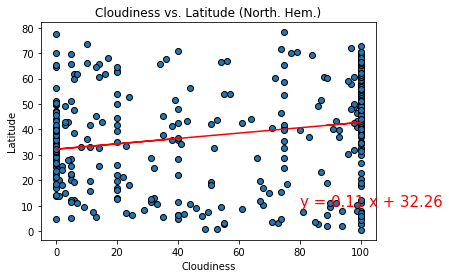

In [65]:
# Northern Hemisphere
x = northern_hemi_df['Cloudiness']
y = northern_hemi_df['Lat']

plt.title("Cloudiness vs. Latitude (North. Hem.)")
plt.xlabel ("Cloudiness")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (80,10))

The r-squared is: 0.4187873792590682


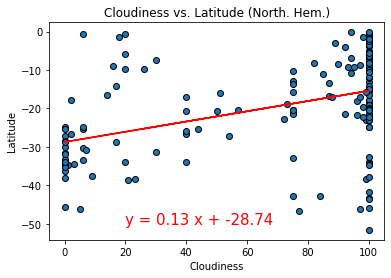

In [67]:
# Southern Hemisphere
x = southern_hemi_df['Cloudiness']
y = southern_hemi_df['Lat']

plt.title("Cloudiness vs. Latitude (North. Hem.)")
plt.xlabel ("Cloudiness")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (20,-50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Cloudiness and latitude fo the the northern and southern hemisphere yield significantly different results.. The norther hemisphere yields an r-value of 0.2, not strongly suggesting movement from the equator increases cloud coverage. And as for the southern hemisphere, an r-value of 0.42 suggests a stronger relationship between country latitude and cloud coverage. It should be noted that countries in the southern hemisphere are located significantly different to those in the northern hemisphere, and should be further investigated for an accurate measure. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03119081317857273


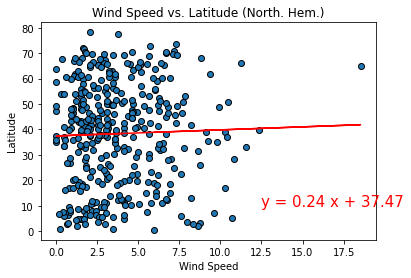

In [69]:
# Northern Hemisphere

x = northern_hemi_df['Wind Speed']
y = northern_hemi_df['Lat']

plt.title("Wind Speed vs. Latitude (North. Hem.)")
plt.xlabel ("Wind Speed")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (12.5,10))

The r-squared is: -0.33999089035768437


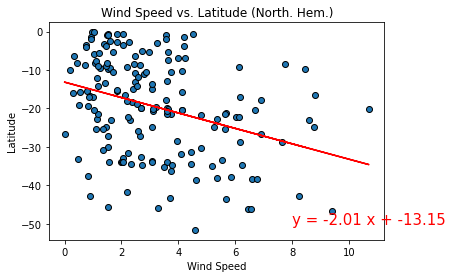

In [71]:
# Southern Hemisphere

x = southern_hemi_df['Wind Speed']
y = southern_hemi_df['Lat']

plt.title("Wind Speed vs. Latitude (North. Hem.)")
plt.xlabel ("Wind Speed")
plt.ylabel ("Latitude")

plot_linear_regression(x, y, (8,-50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Wind speed and the position of a country is the only analysis which yield r-values which were both positive and negative. The northern hemisphere exhibited a marginal positive correlation between windspeed and latitude. The shape of the data reveals that a large proportion of points are on the lower side of the lower wind speeds, regardless of latitude with an r-value oof 0.33.
As for the southern hemisphere, with an r-value of –0.33, the results indicate a slight relationship between windspeed and latitude. The shape of data, although not visually representative of the r-value suggests that as countries move south form the equator, wind speeds tend to increase slightly.  
